# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions To Answer</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
TMDB Movie Data is analysed in this notebook. The data contains about 10K movie data. It has some information about movies like year, genre, overview, budget etc. 

<a id='questions'></a>
## Questions To Answer
<ul>
<li>What is the most popular genre used in the movies?</li>
<li>Which genre has the highest popularity?</li>
<li>Which company has the highest revenue?</li>
</ul>

In [2]:
# import needed packages
# pandas : data structures and data analysis tools
# numpy : 
import pandas as p
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#import the tmdb-movie data file.
df = p.read_csv("tmdb-movies.csv",  encoding='utf-8')



>First five rows in the data set.

In [4]:
#some data information, basic explore, to see data loaded correctly
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


>Number of columns and rows in the data set;

In [5]:
#df.shape ; this returns a tuple of the dimensions of the dataframe

print("Number of rows and columns, respectively, in the data set: " + str(df.shape[0]) + ","  + str(df.shape[1]))

Number of rows and columns, respectively, in the data set: 10866,21


### Data Types
>Investigating Data Types of the columns;

In [6]:
# this returns the datatypes of all the columns
df.dtypes 

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
#further investigation to show data type of a column
print(type(df['imdb_id'][0]))
print(type(df['original_title'][0]))
print(type(df['overview'][0]))

<class 'str'>
<class 'str'>
<class 'str'>


Some columns are seen as object data type but when investigated further we can see that they are originally in string i.e.

>Is there any null values in the data?

In [8]:
df.info() # this displays a concise summary of the dataframe,including the number of non-null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>The total data count is 10.866. It can be seen that there are some columns that have null values. The home page has the highest null columns. The values can bu non-null but can contain unsufficient information about the movie. Like 0 budget or revenue. So the data has to be investigated further with basic statistics.

### Basic Statistics

In [9]:
# this returns useful descriptive statistics for each column of data
df.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Some movies do not have budget or revenue information, it can be seen that from the quintiles information. The min, 1st(25% and 2nd(50%) quintiles shows that the budget has still zero value. The year for this data is after the year 2006.

>One option is the data can be filtered for a budget and revenue analysis for the year 2006 and later. 

>Furthermore some columns are concatenated by | . They can be splited and exploded to rows as new dataframes.

### Data Uniqueness

In [10]:
# check for duplicates in the data
sum(df.duplicated())

1

In [11]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning (Parsing Columns)

> Some columns are concatenated with |. Like Genres, companies, directors. They can be splitted into different data frames and then analysis can be done over this columns.

In [12]:
df_genres = (df.set_index('id')
            ['genres'].str.split('|', expand=True)
            .stack()
            .reset_index(name='genres')
            .drop('level_1',1))

df_genres.head(10)


,id,genres
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action
5,76341,Adventure
6,76341,Science Fiction
7,76341,Thriller
8,262500,Adventure
9,262500,Science Fiction


In [13]:
df_production_companies = (df.set_index('id')
            ['production_companies'].str.split('|', expand=True)
            .stack()
            .reset_index(name='production_companies')
            .drop('level_1',1))

df_production_companies.head(10)

,id,production_companies
0,135397,Universal Studios
1,135397,Amblin Entertainment
2,135397,Legendary Pictures
3,135397,Fuji Television Network
4,135397,Dentsu
5,76341,Village Roadshow Pictures
6,76341,Kennedy Miller Productions
7,262500,Summit Entertainment
8,262500,Mandeville Films
9,262500,Red Wagon Entertainment


In [14]:
df_cast = (df.set_index('id')
            ['cast'].str.split('|', expand=True)
            .stack()
            .reset_index(name='cast')
            .drop('level_1',1))

df_cast.head(5)

,id,cast
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


<a id='eda'></a>
## Exploratory Data Analysis


### What is the most popular genre used in the movies?
> One can think that the most popular genres have the highest revenue so that it has the most production to see that we can check which has the highest production and then compare their revenue by the genres.

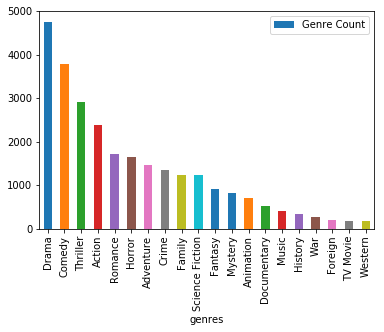

In [15]:
df_genre_count = df_genres.groupby('genres')['id'].count().sort_values(ascending=False)  

df_genre_count.plot(label='Genre Count', legend=True, kind='bar') 


> Here we can see that the most movie genre is Drama and in the second place Comedy.

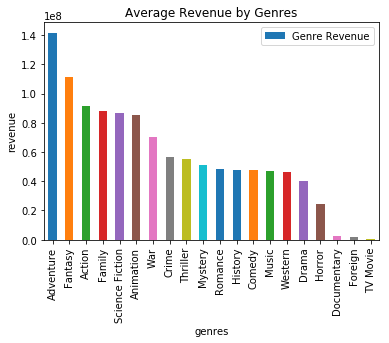

In [21]:
df_genres_revenue = p.merge(df[['id','revenue_adj']], df_genres[['id', 'genres']], on='id')
df_rev = df_genres_revenue.groupby('genres')['revenue_adj'].mean().sort_values(ascending = False)
df_rev.head()

df_rev.plot(label='Genre Revenue', legend=True, kind='bar')
plt.xlabel('genres')
plt.ylabel('revenue')
plt.title('Average Revenue by Genres')
plt.show()

#https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/#whatis


The two data sets, the genres and the movie, are merged on the id column. Since the revenue value is repeated for each genre, the mean value for each genre is calculated based on the genres to divide the revenue for each genre in a simple partition. 
As a result, it can be seen that the most return in revenue is for the adventure genre. And drama has the least revenue according to its highest movie count. Therefore we could not say making drama movie may have less return than other movie genres.

### Which top 10 companies have the highest movie count?

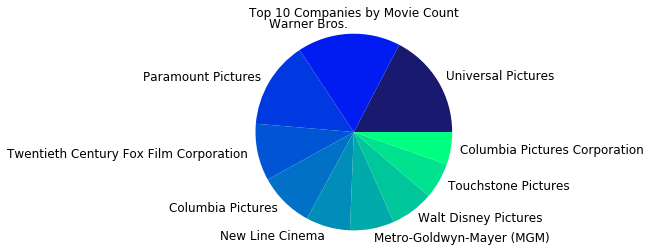

In [52]:
df_company_share = df_production_companies.groupby('production_companies')['id'].count().sort_values(ascending=False)[:10]
#df_company_share.count()
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80', ]
df_company_share.plot(kind='pie', fontsize=12, colors=colors)
plt.axis('equal')
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Companies by Movie Count')
plt.show()



In this pie chart, It can be seen that Universal Pictures, Warner Bros. and Paramount Pictures has the highest share in all the movie production companies.

### What is the trend of movie count by years?

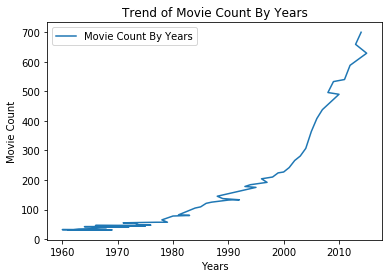

In [53]:
df_year_count = df.groupby('release_year')['id'].count().sort_values(ascending=False)
df_year_count.head()
df_year_count.plot(label='Movie Count By Years', legend=True, kind='line') 
plt.xlabel('Years')
plt.ylabel('Movie Count')
plt.title('Trend of Movie Count By Years')
plt.show()

In years, the movie count is getting higher dramatically. 

### Which genre has the highest popularity?

> to analyse this we have to combine the main data set "df" and the genre dataset "df_genre" which is exploded to rows by splitting the genre column in the "df" data set. And as result it can be seen that action has the most popularity in all the genres.

In [22]:
#df_join_genres = df.join(df_genres, df.id == df_genres.id)

df_join_genres = p.merge(left=df, right=df_genres,
 how='inner', left_on='id',
 right_on='id')
df_join_genres.head(3)

df_genres_sorted_popularity = df_join_genres.sort_values(by = ['popularity'],ascending=False)
df_genres_sorted_popularity[['id','genres_y','popularity']].head(5) 

,id,genres_y,popularity
0,135397,Action,32.985763
2,135397,Science Fiction,32.985763
3,135397,Thriller,32.985763
1,135397,Adventure,32.985763
4,76341,Action,28.419936


### Which company has the highest popularity?

> to analyse this we have to combine the main data set "df" and the genre dataset "df_production_companies" which is exploded to rows by splitting the genre column in the "df" data set. 

In [23]:
df_join_company = p.merge(left=df, right=df_production_companies,
 how='inner', left_on='id',
 right_on='id')
df_join_company.head(3)


df_join_company.groupby('production_companies_y')['revenue_adj'].sum().sort_values(ascending=False).head(3)

#df_director_revenue = df_join_genres.sort_values(by = ['popularity'],ascending=False)
#df_genres_sorted_popularity[['id','genres_y','popularity']].head(5) 

production_companies_y
Warner Bros.          7.104849e+10
Universal Pictures    6.432196e+10
Paramount Pictures    5.746967e+10
Name: revenue_adj, dtype: float64

<a id='conclusions'></a>
## Conclusions

From the analysis it can be seen that comedy and drama movies are the most produced movies but action movies are the most popular ones. 

Additional warner bross has the highest revenue among the production companies.

But there are many missing values in the revenue values therefore this cannot be an exact conclusion. 